In [10]:
from google.colab import drive
drive.mount('/content/drive/')
import shutil
from google.colab import files


Mounted at /content/drive/


In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
import re
import cv2
import imageio
from PIL import Image, ImageDraw, ImageFont

In [54]:
data_path = "/content/drive/MyDrive/Pressure_rawdata"
gray_img_path = "/content/drive/MyDrive/Pressure_raw_Image"
color_img_path = "/content/drive/MyDrive/731-738_color_image"
output_path = "/content/drive/MyDrive/731-738_image"
# os.makedirs(color_img_path)
# os.makedirs(output_path)

In [60]:
max_min_dict = {}
for file in os.listdir(data_path):
    num = int(re.compile(r'day(\d+).csv').match(file).group(1))
    if num >= 731 and num <= 738:
        df = pd.read_csv(data_path + "/" + file, header = None)
        min = math.floor(df.min().min()/100) * 100
        max = math.ceil(df.max().max()/100) * 100
        exact_max = df.max().max()
        exact_min = df.min().min()
        cls = (max - min)/100
        max_min_dict[num] = [exact_max, exact_min]

        def get_cluster(num):
            return (num // 100) * 100

        df_clusters= df.applymap(get_cluster)
        cluster = np.array(df_clusters).reshape(-1,1)
        non_rgb_colors = np.arange(1, cls + 1).reshape(-1, 1)
        color_img = cluster.reshape(df_clusters.shape)
        normalized_data = (color_img - np.min(color_img)) / (np.max(color_img) - np.min(color_img))
        colored_data = plt.cm.viridis(normalized_data)

        # Convert data from [0, 1] float to [0, 255] uint8 for saving as image
        colored_data_255 = (colored_data[:, :, :3] * 255).astype(np.uint8)
        imageio.imwrite(color_img_path + "/day" + str(num) + ".png", colored_data_255)

In [71]:
font_size = 9
font_path = "/content/Roboto-Bold.ttf"
font = ImageFont.truetype(font_path, font_size)

In [72]:
for file in os.listdir(color_img_path):
    file_name = os.path.splitext(file)[0]
    num = int(file_name[3:])
    color_path = os.path.join(color_img_path, file)

    if os.path.exists(os.path.join(gray_img_path, file)):
        gray_path = os.path.join(gray_img_path, file)
        color_img = cv2.imread(color_path)
        gray_img = cv2.imread(gray_path)

        height, width, channel = color_img.shape
        white_img = Image.new("RGB", (width, height), (255, 255, 255))
        max = max_min_dict[num][0]
        min = max_min_dict[num][1]
        text = "Max: " + str(max) + "\n" + "Min: " + str(min)
        draw = ImageDraw.Draw(white_img)
        draw.text((10, 10), text, fill = "black", font = font)

        final_img = np.concatenate((gray_img, color_img, white_img), axis = 1)
        cv2.imwrite(output_path + "/day" + str(num) + ".png", final_img)



In [ ]:
df = pd.read_csv("/content/day737.csv", header = None)
df

In [4]:
min = math.floor(df.min().min()/100) * 100
max = math.ceil(df.max().max()/100) * 100
exact_max = df.max().max()
exact_min = df.min().min()
cls = (max - min)/100
cls

def get_cluster(num):
    return (num // 100) * 100

df_clusters= df.applymap(get_cluster)
cluster = np.array(df_clusters).reshape(-1,1)
non_rgb_colors = np.arange(1, cls + 1).reshape(-1, 1)

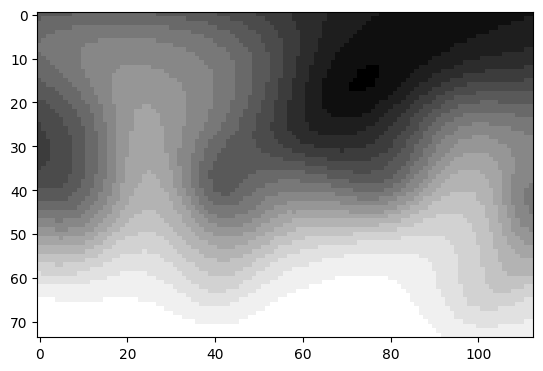

In [5]:
gray_img = cluster.reshape(df_clusters.shape)
plt.imshow(gray_img, cmap = "gray")
plt.show()

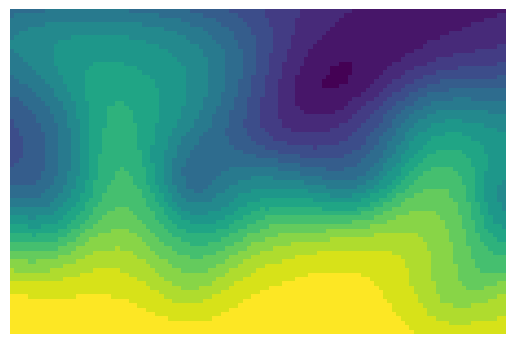

In [9]:
color_img = cluster.reshape(df_clusters.shape)
plt.imshow(color_img)
plt.axis("off")
plt.savefig("day737.png", bbox_inches='tight', pad_inches=0)

In [ ]:
label = np.array(df_clusters)

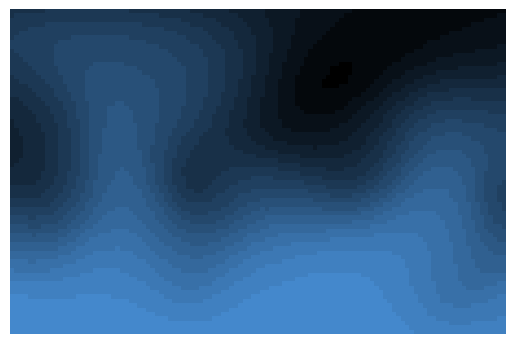

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_deterministic_colors(n):
    """
    Generate n distinct colors using a deterministic method.
    Colors increase gradually in the RGB space following the pattern (16, 32, 16+).
    """
    colors = []
    r = 0;
    g = 0;
    b = 0;
    counter = 0
    while counter < n:
        colors.append((r, g, b))
        r += 4
        g += 8
        b += 12
        counter += 1

    return colors

# Convert the list to numpy array
matrix = np.array(label)

# Get the unique values
unique_values = np.unique(matrix)

# Ensure n is within the valid range

# Generate a unique color for each unique value
colors = generate_deterministic_colors(len(unique_values))
color_map = dict(zip(unique_values, colors))

# Normalize colors to [0, 1] range
normalized_color_map = {k: tuple([x/255. for x in v]) for k, v in color_map.items()}

# Create a new matrix to store the colors
color_matrix = np.zeros(matrix.shape + (3,), dtype=float)  # We're using the RGB format

# Fill the new matrix with the corresponding colors
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        color_matrix[i, j] = normalized_color_map[matrix[i, j]]

# Display the resulting image
plt.imshow(color_matrix)
plt.axis('off')  # Turn off axis
plt.show()


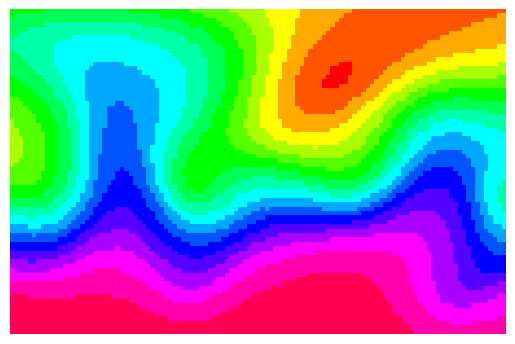

In [ ]:
def generate_distinct_colors(n):
    """Generate n distinct colors by varying hue in HSV and converting to RGB."""
    colors = []
    for i in range(n):
        hue = i / float(n)
        saturation = 1.0
        value = 1.0
        colors.append(hsv_to_rgb(hue, saturation, value))
    return colors

def hsv_to_rgb(h, s, v):
    """Convert HSV color to RGB color."""
    import colorsys
    return colorsys.hsv_to_rgb(h, s, v)

# Convert the list to numpy array
matrix = np.array(label)

# Get the unique values
unique_values = np.unique(matrix)

# Generate a unique color for each unique value
distinct_colors = generate_distinct_colors(len(unique_values))
color_map = {}

for idx, value in enumerate(unique_values):
    color_map[value] = distinct_colors[idx]

# Create a new matrix to store the colors
color_matrix = np.zeros(matrix.shape + (3,), dtype=float)

# Fill the new matrix with the corresponding colors
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        color_matrix[i, j] = color_map[matrix[i, j]]

# Display the resulting image
plt.imshow(color_matrix)
plt.axis('off')  # Turn off axis
plt.show()
